# Airlines Customer Satisfaction - KNN Analysis

> This document explores the KNN algorithm in depth on the Airlines Customer Satisfaction dataset.

---

# Contents

* [1. Introduction](#1)
* [2. K-Nearest Neighbours (KNN)](#2)
    * [2.1. Working](#2.1)
    * [2.2. Choosing the right K value](#2.2)
    * [2.3. Predictions made on test data](#2.3)
    * [2.4. Pros and Cons](#2.4)
* [3. Importing Libraries](#3)
* [4. Data](#4)
    * [4.1. Context](#4.1)
    * [4.2. Attribute Information](#4.2)
* [5. Data Pre-Processing](#5)
* [6. Exploratory Data Analysis](#6)
    * [6.1. Target Attribute](#6.1)
    * [6.2. Categorical Attributes](#6.2)
    * [6.3. Numerical Attributes](#6.3)
    * [6.4. Outliers](#6.4)
    * [6.5. Correlation](#6.5)
* [7. Modelling](#7)
    * [7.1. 60-20-20 Split](#7.1)
        * [7.1.1. KNN](#7.1.1)
    * [7.2. 80-10-10 Split](#7.2)
        * [7.2.1. KNN](#7.2.1)
    * [7.3. Hyperparameter Tuning](#7.3)
* [8. Conclusion](#8)
* [9. References](#9)

---

# 1. Introduction <a class="anchor" id="1"></a>

> * In this Data Science report, I have chosen to explore the **K-Nearest Neighbors (KNN) classification** algorithm in depth. 
> * The KNN algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.
> * I have applied this chosen KNN classification algorithm on "Airlines Customer satisfaction" dataset found on [Kaggle](https://www.kaggle.com/) 
> * [Link to the dataset](https://www.kaggle.com/sjleshrac/airlines-customer-satisfaction)

---

# 2. K-Nearest Neighbors (KNN) <a class="anchor" id="2. K-Nearest Neighbors (KNN)"></a>

> * The K-Nearest Neighbors (KNN) alogrithm is a supervised machine learning algorithm that is used for solving classification and regression problems.
> * As the name suggests, it considers K Nearest Neighbors i.e. data points, to predict the classes or continuous values for the new datapoints.
> * A supervised machine learning algorithm uses labeled datasets to train algorithms to classify data or predict outcomes accurately.
> * Classification means to classify the data into different classes. In Binary Classification, the data is classified into two classes. 
> * Although KNN is used to solve both classification and regression problems, it is commonly used for classification problems.

### 2.1. Working <a class="anchor" id="2.1. Working"></a>

> * The KNN algorithm assumes that similar things exist in close proximity i.e. near to each other.

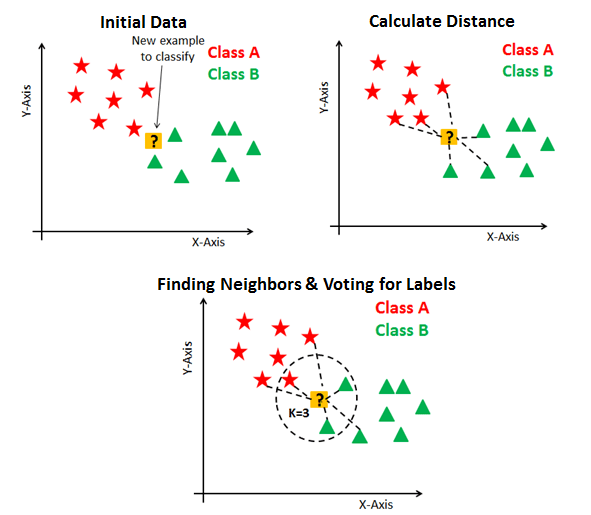

> * Nearest neighbors are those data points that have minimum distance in feature space from our new data point. Closer neighbours have greater influence than the ones that are further away.
> * K is the number of such data points we consider in our implementation of the algorithm.
> * For Classification, a class label assigned to the majority of K Nearest Neighbors from the training dataset is considered as a predicted class for the new data point.
> * It calculates the distance between neighbours in order to make prediction. This distance can be calculated depending on the problem statement.


### 2.2. Choosing the right K value <a class="anchor" id="2.2"></a>

> * Choosing the right K value is one of the most important steps in implementing this model.
    * As we decrease the K value, our predictions become less stable.
    * As we increase the K value, our predictions become more stable up to a certain point. After this point error starts increasing.
    * K value should be odd while performing binary classification

### 2.3. Predictions made on test data <a class="anchor" id="2.3"></a>

> * Following steps give an idea on how the predictions are made on test data:
    * 1. Choose the right K value.
    * 2. Compute the distance between test data and train data.
    * 3. Sort the distance and based on the K-th minimum distance, determine nearest neighbours.
    * 4. Assemble the categories of the nearest neighbours.
    * 5. Make predictions on the test data based on the majority category of nearest neighbours.

### 2.4. Pros and Cons <a class="anchor" id="2.4"></a>

> * Pros:
    * The algorithm is simple and easy to implement.
    * There’s no need to build a model, tune several parameters, or make additional assumptions.
    * The algorithm is versatile. It can be used for classification and regression.
> * Cons:
    * The algorithm gets significantly slower as the number of examples and/or predictors/independent variables increase.

---

# 3. Importing Libraries <a class="anchor" id="3"></a>

In [1]:
# general libraries
import numpy as np
import pandas as pd 

# data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# statistic and machine learning libraries
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# warnings
from warnings import filterwarnings
filterwarnings('ignore')

---

# 4. Data <a class="anchor" id="4"></a>

## 4.1. Context <a class="anchor" id="4.1"></a>

> * Description of the data set as per the data set creator:
    * This data given by an airline organization. The actual name of the company is not given due to various purposes that's why the name Invistico airlines.
    * The dataset consists of the details of customers who have already flown with them. The feedback of the customers on various context and their flight data has been consolidated.
    * The main purpose of this dataset is to predict whether a future customer would be satisfied with their service given the details of the other parameters values.
    * Also the airlines need to know on which aspect of the services offered by them have to be emphasized more to generate more satisfied customers.

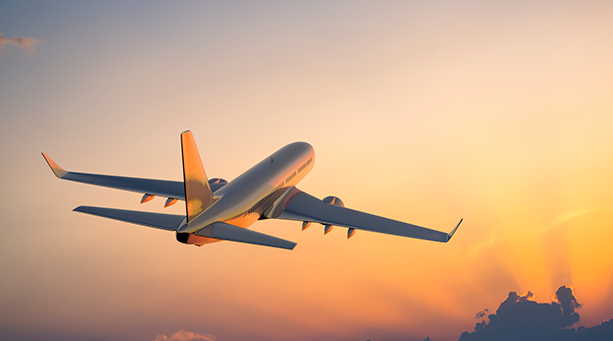


In [10]:
# loading the data set
df = pd.read_csv("C:\\Users\\revon\\OneDrive - University of Bristol\\MSc DS @UoB\\TB-1\\SCEM\\tl21048_EMATM0061_summative_assessment\\tl21048_EMATM0061_C\\Invistico_Airline.csv")

In [11]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


## 4.2. Attribute Information <a class="anchor" id="4.2"></a>

> There are a total of 5 categorical attributes and 18 numerical attributes 

> * **Target Attribute:**
    * **Satisfaction**: Airline satisfaction level (satisfied or dissatisfied)

> * **Remaining Attributes:** #edit
    * **Gender**: Gender of the passengers (Male or Female)
    * **Customer Type**: The customer type (Loyal customer or disloyal customer)
    * **Age**: Age of the passengers
    * **Type of Travel**: Purpose of the flight of the passengers (Personal Travel or Business Travel)
    * **Class**: Travel class in the plane of the passengers (Business, Eco or Eco Plus)
    * **Flight distance**: The flight distance of the journey
    * **Departure Delay in Minutes**: Minutes delayed when departure
    * **Arrival Delay in Minutes**: Minutes delayed when Arrival
    * **Baggage handling**: Satisfaction level of baggage handling (from scale 1-5 where '1' is "Least Satisfied" and '5' is "Most Satisfied")
    * Following attributes are satisfaction levels marked from scale 0-5 where '0' stands for "Not Applicable", '1' is "Least Satisfied" and '5' is "Most Satisfied"
        * **Seat comfort**: Satisfaction level of Seat comfort
        * **Departure/Arrival time convenient**: Satisfaction level of Departure/Arrival time convenient
        * **Food and drink**: Satisfaction level of Food and drink
        * **Gate location**: Satisfaction level of Gate location
        * **Inflight wifi service**: Satisfaction level of the inflight wifi service
        * **Inflight entertainment**: Satisfaction level of inflight entertainment
        * **Online support**: Satisfaction level of Online Support
        * **Ease of Online booking**: Satisfaction level of online booking
        * **On-board service**: Satisfaction level of On-board service
        * **Leg room service**: Satisfaction level of Leg room service
        * **Check-in service**: Satisfaction level of Check-in service
        * **Cleanliness**: Satisfaction level of Cleanliness
        * **Online boarding**: Satisfaction level of online boarding

---

# 5. Data Pre-Processing <a class="anchor" id="5"></a>

In [4]:
# general information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [5]:
# renaming a few columns
df = df.rename(columns={'Departure/Arrival time convenient':'Departure/Arrival time convenience',
                        'Leg room service':'Leg room',
                        'Class':'Flight Class'})

In [6]:
# capitalizing each word
from string import capwords
df.columns = [capwords(i) for i in df.columns]

In [7]:
# number of unique values in each attribute
df.nunique()

Satisfaction                             2
Gender                                   2
Customer Type                            2
Age                                     75
Type Of Travel                           2
Flight Class                             3
Flight Distance                       5398
Seat Comfort                             6
Departure/arrival Time Convenience       6
Food And Drink                           6
Gate Location                            6
Inflight Wifi Service                    6
Inflight Entertainment                   6
Online Support                           6
Ease Of Online Booking                   6
On-board Service                         6
Leg Room                                 6
Baggage Handling                         5
Checkin Service                          6
Cleanliness                              6
Online Boarding                          6
Departure Delay In Minutes             466
Arrival Delay In Minutes               472
dtype: int6

In [8]:
df['Customer Type'].value_counts()

Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64

In [9]:
# a customer chooses a flight depending on his/her requirements. Loyal and disloyal are strong words for classifying flight journey customers. For this reason, the names have been changed.
df['Customer Type'].replace({'Loyal Customer':'Returning Customer',
                     'disloyal Customer':'New Customer'},inplace = True)
df['Customer Type'].value_counts()

Returning Customer    106100
New Customer           23780
Name: Customer Type, dtype: int64

In [10]:
df['Flight Class'].value_counts()

Business    62160
Eco         58309
Eco Plus     9411
Name: Flight Class, dtype: int64

In [11]:
# classifying "Eco" and "Eco plus" as a single value "Economy"
df['Flight Class'].replace({'Business':'Business',
                     'Eco':'Economy',
                     'Eco Plus':'Economy'},inplace = True)
df['Flight Class'].value_counts()

Economy     67720
Business    62160
Name: Flight Class, dtype: int64

In [12]:
df['Seat Comfort'].value_counts()

3    29183
2    28726
4    28398
1    20949
5    17827
0     4797
Name: Seat Comfort, dtype: int64

In [13]:
df['Baggage Handling'].value_counts()

4    48240
5    35748
3    24485
2    13432
1     7975
Name: Baggage Handling, dtype: int64

In [14]:
df.isnull().sum()

Satisfaction                            0
Gender                                  0
Customer Type                           0
Age                                     0
Type Of Travel                          0
Flight Class                            0
Flight Distance                         0
Seat Comfort                            0
Departure/arrival Time Convenience      0
Food And Drink                          0
Gate Location                           0
Inflight Wifi Service                   0
Inflight Entertainment                  0
Online Support                          0
Ease Of Online Booking                  0
On-board Service                        0
Leg Room                                0
Baggage Handling                        0
Checkin Service                         0
Cleanliness                             0
Online Boarding                         0
Departure Delay In Minutes              0
Arrival Delay In Minutes              393
dtype: int64

- Arrival Delay in Minutes has 393 missing values

In [15]:
# missing values consist of 0.3% of the total number of rows. Dropping them wouldn't largely impact the model.
df = df.dropna()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Satisfaction                        129487 non-null  object 
 1   Gender                              129487 non-null  object 
 2   Customer Type                       129487 non-null  object 
 3   Age                                 129487 non-null  int64  
 4   Type Of Travel                      129487 non-null  object 
 5   Flight Class                        129487 non-null  object 
 6   Flight Distance                     129487 non-null  int64  
 7   Seat Comfort                        129487 non-null  int64  
 8   Departure/arrival Time Convenience  129487 non-null  int64  
 9   Food And Drink                      129487 non-null  int64  
 10  Gate Location                       129487 non-null  int64  
 11  Inflight Wifi Service     

In [17]:
df['Departure Delay In Minutes'].value_counts()

0       73209
1        3671
2        2845
3        2530
4        2298
        ...  
1128        1
270         1
499         1
435         1
472         1
Name: Departure Delay In Minutes, Length: 464, dtype: int64

In [18]:
df['Arrival Delay In Minutes'].value_counts()

0.0      72753
1.0       2747
2.0       2587
3.0       2442
4.0       2373
         ...  
543.0        1
400.0        1
406.0        1
339.0        1
484.0        1
Name: Arrival Delay In Minutes, Length: 472, dtype: int64

In [19]:
# adding "Departure Delay In Minutes" and "Arrival Delay In Minutes" as a single value "Total Delay In Minutes"
df['Total Delay In Minutes'] = df['Departure Delay In Minutes'] + df['Arrival Delay In Minutes']
df = df.drop(['Departure Delay In Minutes','Arrival Delay In Minutes'], axis = 1)

In [20]:
df.head()

,Satisfaction,Gender,Customer Type,Age,Type Of Travel,Flight Class,Flight Distance,Seat Comfort,Departure/arrival Time Convenience,Food And Drink,...,Inflight Entertainment,Online Support,Ease Of Online Booking,On-board Service,Leg Room,Baggage Handling,Checkin Service,Cleanliness,Online Boarding,Total Delay In Minutes
0,satisfied,Female,Returning Customer,65,Personal Travel,Economy,265,0,0,0,...,4,2,3,3,0,3,5,3,2,0.0
1,satisfied,Male,Returning Customer,47,Personal Travel,Business,2464,0,0,0,...,2,2,3,4,4,4,2,3,2,615.0
2,satisfied,Female,Returning Customer,15,Personal Travel,Economy,2138,0,0,0,...,0,2,2,3,3,4,4,4,2,0.0
3,satisfied,Female,Returning Customer,60,Personal Travel,Economy,623,0,0,0,...,4,3,1,1,0,1,4,1,3,0.0
4,satisfied,Female,Returning Customer,70,Personal Travel,Economy,354,0,0,0,...,3,4,2,2,0,2,4,2,5,0.0


In [21]:
# rearranging the target column to the last
df = df.reindex(columns = [col for col in df.columns if col != 'Satisfaction'] + ['Satisfaction'])
df['Satisfaction'].replace({'dissatisfied': 0, 'satisfied': 1},inplace = True)
df.head()

,Gender,Customer Type,Age,Type Of Travel,Flight Class,Flight Distance,Seat Comfort,Departure/arrival Time Convenience,Food And Drink,Gate Location,...,Online Support,Ease Of Online Booking,On-board Service,Leg Room,Baggage Handling,Checkin Service,Cleanliness,Online Boarding,Total Delay In Minutes,Satisfaction
0,Female,Returning Customer,65,Personal Travel,Economy,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0.0,1
1,Male,Returning Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,615.0,1
2,Female,Returning Customer,15,Personal Travel,Economy,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0.0,1
3,Female,Returning Customer,60,Personal Travel,Economy,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0.0,1
4,Female,Returning Customer,70,Personal Travel,Economy,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0.0,1


In [22]:
# removing rows that have satisfaction level marked as '0' as the data is not applicable (customers probably did not have this feature or did not indicate)
df = df[(df['Inflight Wifi Service']!=0)&(df['Departure/arrival Time Convenience']!=0)&(df['Ease Of Online Booking']!=0)&(df['Gate Location'])&(df['Food And Drink']!=0)&(df['Online Boarding']!=0)&(df['Seat Comfort']!=0)&(df['Inflight Entertainment']!=0)&(df['On-board Service']!=0)&(df['Leg Room']!=0)&(df['Baggage Handling']!=0)&(df['Checkin Service']!=0)&(df['Cleanliness']!=0)]

In [23]:
df.info() # general information about the cleaned dataset 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69265 entries, 1037 to 129879
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Gender                              69265 non-null  object 
 1   Customer Type                       69265 non-null  object 
 2   Age                                 69265 non-null  int64  
 3   Type Of Travel                      69265 non-null  object 
 4   Flight Class                        69265 non-null  object 
 5   Flight Distance                     69265 non-null  int64  
 6   Seat Comfort                        69265 non-null  int64  
 7   Departure/arrival Time Convenience  69265 non-null  int64  
 8   Food And Drink                      69265 non-null  int64  
 9   Gate Location                       69265 non-null  int64  
 10  Inflight Wifi Service               69265 non-null  int64  
 11  Inflight Entertainment              6

## Numerical Attributes

In [24]:
# printing all numerical attributes
df_numerical = df.select_dtypes(exclude=['object']).columns
print(df_numerical)

Index(['Age', 'Flight Distance', 'Seat Comfort',
       'Departure/arrival Time Convenience', 'Food And Drink', 'Gate Location',
       'Inflight Wifi Service', 'Inflight Entertainment', 'Online Support',
       'Ease Of Online Booking', 'On-board Service', 'Leg Room',
       'Baggage Handling', 'Checkin Service', 'Cleanliness', 'Online Boarding',
       'Total Delay In Minutes', 'Satisfaction'],
      dtype='object')


## Categorical Attributes

In [25]:
# printing all categorical attributes
df_categorical = df.select_dtypes(include=['object']).columns
print(df_categorical)

Index(['Gender', 'Customer Type', 'Type Of Travel', 'Flight Class'], dtype='object')


---

# 6. Exploratory Data Analysis <a class="anchor" id="6"></a>

## 6.1. Target Attribute <a class="anchor" id="6.1"></a>

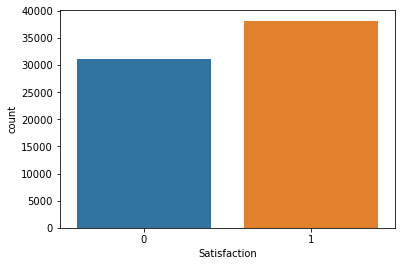

In [26]:
sns.countplot(x ='Satisfaction', data = df)
plt.show()

> **Insights:**
> * Data set is fairly balanced

## 6.2. Categorical Attributes <a class="anchor" id="6.2"></a>

In [27]:
# function to draw insights from categorical data 
def count_plot(variable):
    
    var = df[variable]

    #plot
    plt.figure(figsize=(10,5))
    sns.countplot(x = var, hue = 'Satisfaction', data = df)

    plt.show()

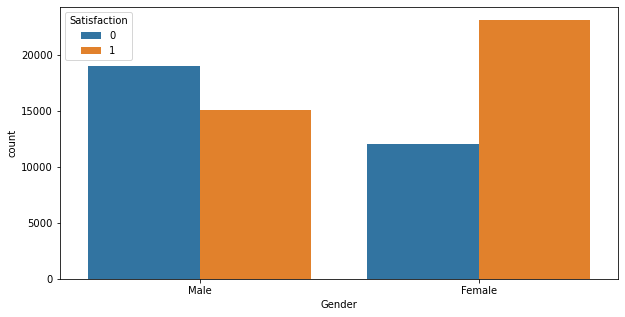

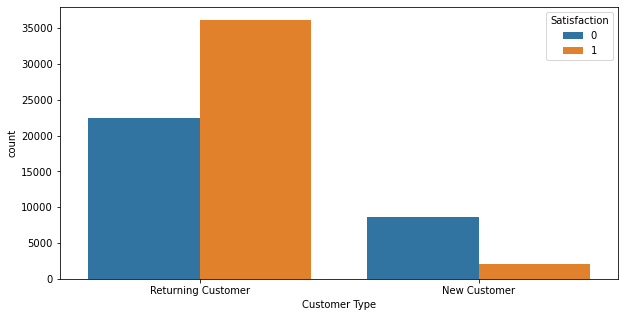

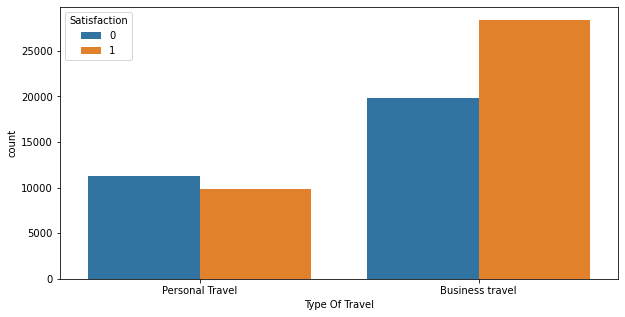

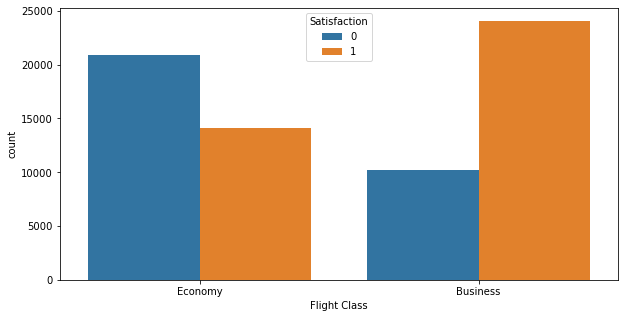

In [28]:
for i in df_categorical:
    count_plot(i)

> **Insights:**
> * Females are satisfied more with their flight journey than males.
> * New customers are more dissatisfied or probably felt indifferent to the flight experience compared to the returning customers.
> * People who have travelled due to business reasons are satisfied more with their flight journey than those for personal reasons. It could be due to the fact that the respective company of the customer has paid for his/her travel.
> * The economy class services provided by the flight company are not appreciated by most of the customers. Whereas, the business class customers are really satisfied with their flight journey.

## 6.3. Numerical Attributes <a class="anchor" id="6.3"></a>

In [29]:
df['Age'].nunique()

75

In [30]:
# since there are 75 different values for Age, it is better to draw insights after categorizing into different Age groups
def age_group(age):
    if age <= 13:
        return 'Children'
    if age <= 18:
        return 'Teenagers'
    elif 18 < age <= 30:
        return 'Youth'
    elif 30 < age < 60:
        return 'Adults'
    else:
        return 'Seniors'

In [31]:
df_age = df[['Age', 'Satisfaction']].copy()
df_age.Age = df.Age.apply(age_group)

<AxesSubplot:xlabel='Age', ylabel='count'>

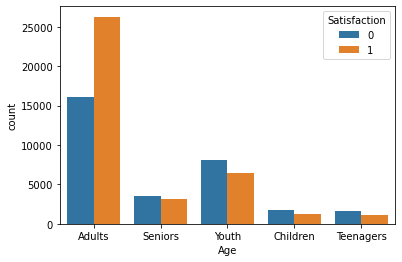

In [32]:
sns.countplot(x = 'Age', hue = 'Satisfaction', data = df_age)

> **Insights:**
> * Adults from the age groups 30-60 are the most satisfied with their flight journey. 

In [33]:
# function to draw insights from numerical data consisting of attributes that have satisfaction levels marked from scale 1-5 where '1' is "Least Satisfied" and '5' is "Most Satisfied" 
def bar_plot(variable):
    
    var = df[variable]
    var_value = var.value_counts()
    
    #plot
    plt.figure(figsize=(9,3))
    sns.countplot(x = var, data = df)
    
    plt.xlabel("Passengers Score")
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()

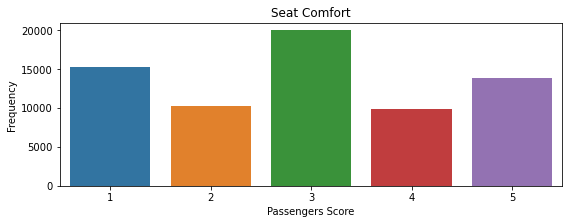

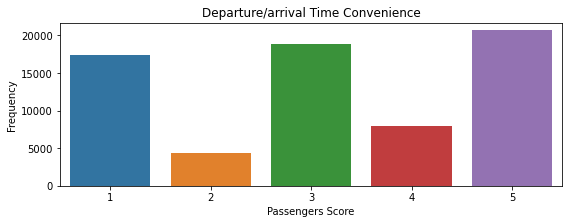

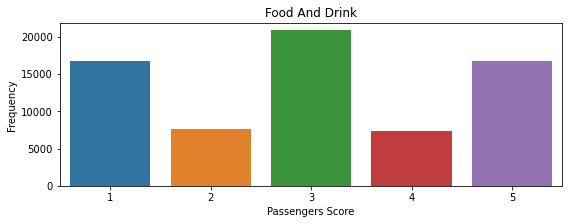

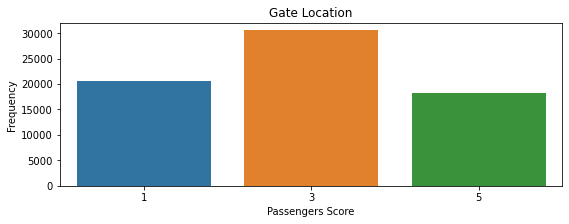

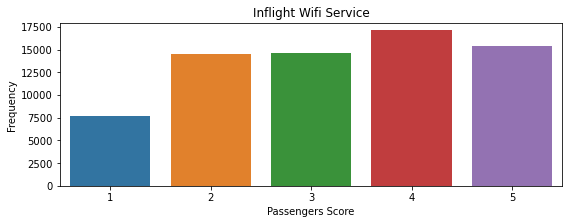

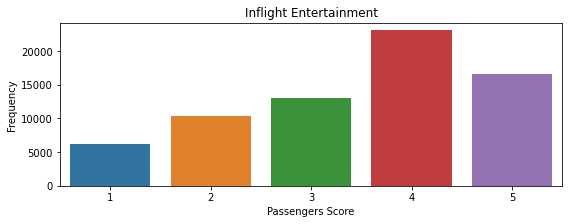

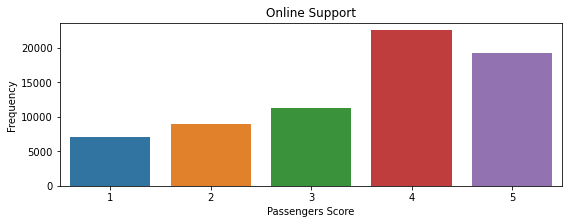

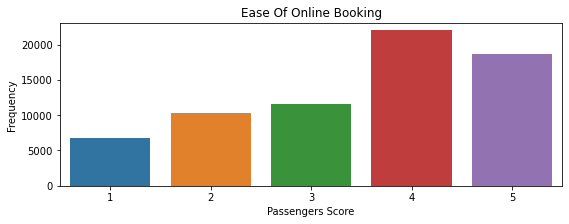

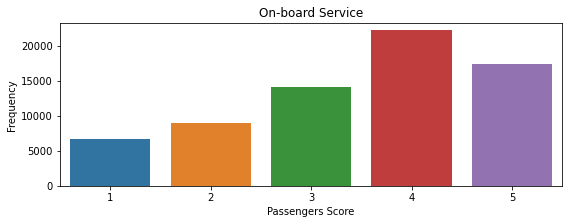

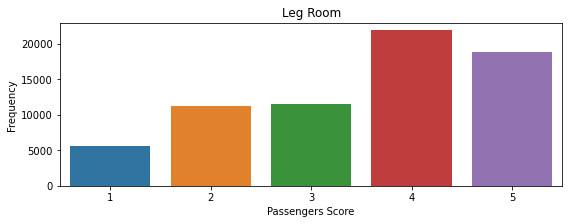

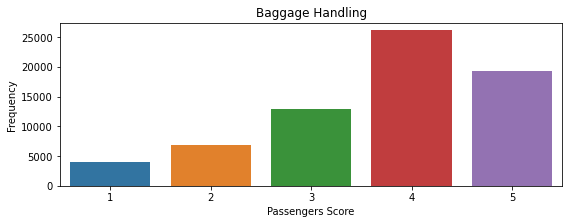

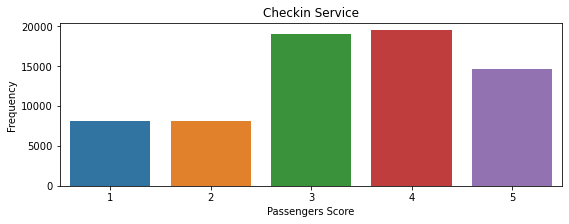

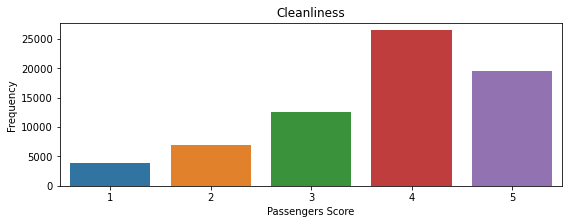

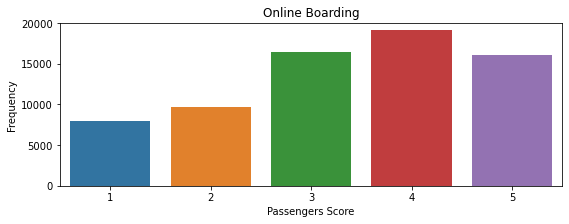

In [34]:
df_satisfaction = ["Seat Comfort", "Departure/arrival Time Convenience", "Food And Drink", "Gate Location", "Inflight Wifi Service", "Inflight Entertainment", "Online Support", "Ease Of Online Booking", "On-board Service", "Leg Room", "Baggage Handling", "Checkin Service", "Cleanliness", "Online Boarding"]
for i in df_satisfaction:
    bar_plot(i)

> **Insights:**

> * **Mixed Score**: The Airline company has to implement changes in order to improve the following attributes.  
    * Seat Comfort - Could have been affected by additional factors such as the the flight class i.e. business or economic class.
    * Departure/Arrival time convenience - This attribute could have been partly dependant on external factors. Time slot availabilties can be affected due to other flights from different companies.
    * Food And Drink - One possible reason is that the food/drinks are subjective to the customer's taste. It varies from customer to customer.
    * Gate Location - Again, this is one of the attributes that the airline company might not have complete control. Few flight's gate locations could be favourable to the customer and others might not.
> * **Mixed Positive Score**: The Airline company has room for improvement and has to do few minor tweaks to improve the overall flight experience for the customers in the following attributes. 
    * Inflight Wifi Service
    * Checkin Service
    * Online Boarding
> * **Positive Score**: The Airline company has provided good levels of satisfaction to the customers in the following attributes. The company can probably do marketing highlighting these features. 
    * Inflight Entertainment
    * Online Support
    * Ease Of Online Booking
    * On-board Service
    * Leg Room
    * Baggage Handling
    * Cleanliness

## 6.4. Outliers <a class="anchor" id="6.4"></a>

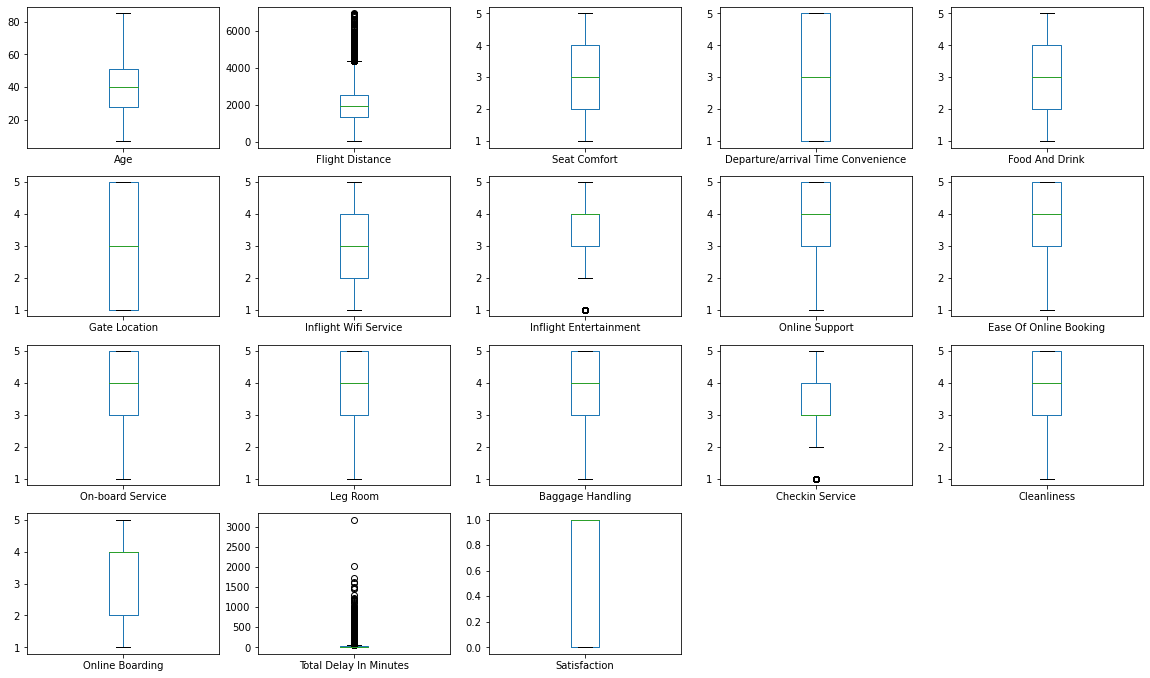

In [35]:
# plot to visualize the outliers
df.plot(kind = "box" , subplots = True , figsize = (20,15) ,  layout = (5,5))
plt.show()

> **Insights:**
> * Flight Distance and Total Delay in Minutes have most of the outliers.
     * The Flight company cannot do anything to change the flight distance. Hence this column can be dropped.
     * Total delay in Minutes can also be dropped as the the number of outliers are very high. The delay caused could be due to many reasons such as weather, emergency or natural reasons.

In [36]:
# dropping unnecessary columns
df = df.drop(['Flight Distance', 'Total Delay In Minutes'], axis = 1)

## 6.5. Correlation <a class="anchor" id="6.5"></a>

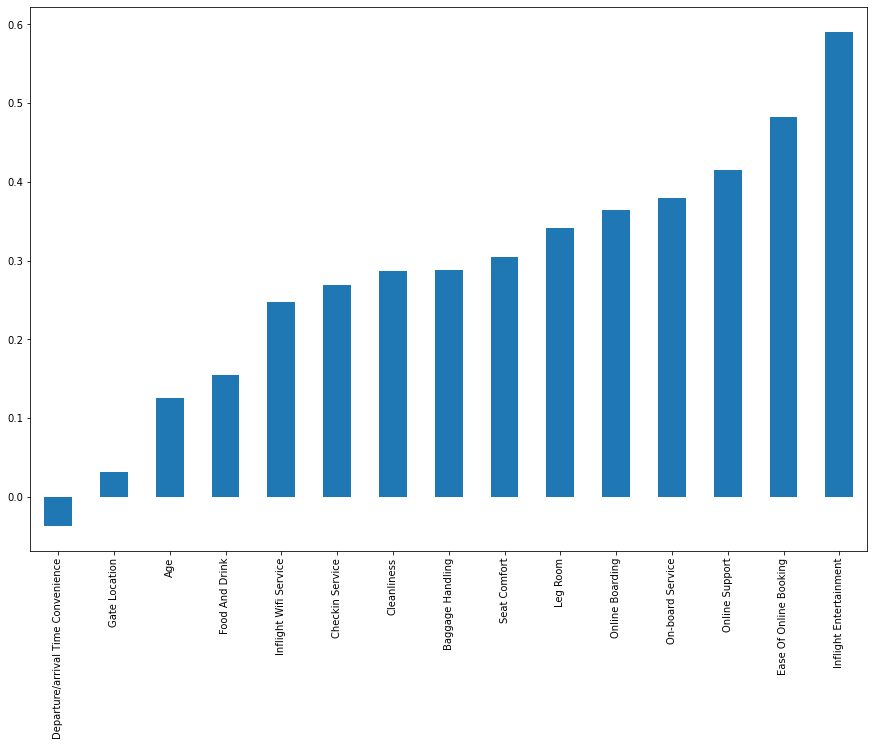

In [37]:
# plot to visualize the correlation
df.corr()['Satisfaction'].sort_values().drop('Satisfaction').plot(kind='bar',figsize = (15,10))
plt.show()

> **Insights:**
> * **Negatively correlated:**
    * Departure/arrival Time Convenience 
> * **Low Correlation:**
    * Gate Location
    * Age
    * Food And Drink

- - -

# 7. Modelling <a class="anchor" id="7"></a>

In [38]:
# binary encoding the categorical variables
df['Gender'].replace({'Male': 0, 'Female': 1},inplace = True)
df['Flight Class'].replace({'Economy': 0, 'Business': 1},inplace = True)
df['Type Of Travel'].replace({'Personal Travel': 0, 'Business travel': 1},inplace = True)
df['Customer Type'].replace({'New Customer': 0, 'Returning Customer': 1},inplace = True)

In [39]:
df['Satisfaction'].value_counts()

1    38193
0    31072
Name: Satisfaction, dtype: int64

In [40]:
# defining X and y
X = df.drop(['Satisfaction'], axis =1)
y = df.Satisfaction

## 7.1. 60-20-20 Split <a class="anchor" id="7.1"></a>

In [41]:
# train size  = 0.6 (60% of complete data)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size = 0.6, random_state = 10)
# valid_size = 0.5 (50% of remaining data)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size = 0.5, random_state = 10)

In [42]:
# printing shapes of split data
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(41559, 19)
(41559,)
(13853, 19)
(13853,)
(13853, 19)
(13853,)


(None, None)

In [43]:
# scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

### 7.1.1. KNN <a class="anchor" id="7.1.1"></a>

Train Accuracy = 0.9518515844943334
Validation Accuracy = 0.9283909622464448
ROC Area under Curve = 0.9289716479287906
[[5876  407]
 [ 585 6985]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      6283
           1       0.94      0.92      0.93      7570

    accuracy                           0.93     13853
   macro avg       0.93      0.93      0.93     13853
weighted avg       0.93      0.93      0.93     13853



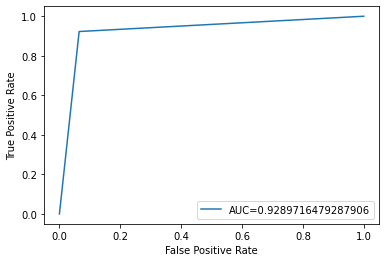

In [44]:
# knn classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_valid)

#train and validation scores
train_score = knn_model.score(X_train,y_train)
validation_score = knn_model.score(X_valid,y_valid)
roc_auc = roc_auc_score(y_valid, y_pred)

# printing the performance metrics
print("Train Accuracy = {}".format(train_score))
print("Validation Accuracy = {}".format(validation_score))
print("ROC Area under Curve = {}".format(roc_auc))
print(confusion_matrix(y_valid, y_pred))

print(classification_report(y_valid, y_pred))
fpr, tpr, _ = metrics.roc_curve(y_valid,  y_pred)
auc = metrics.roc_auc_score(y_valid, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [45]:
# checking unique values
predictions = pd.DataFrame(y_pred)
predictions[0].value_counts()

1    7392
0    6461
Name: 0, dtype: int64

> In this binary classification problem, "satisfied" or "1" is positive class and "dissatisfied" or "0" is negative class.
> * A **true positive** is an outcome where the model correctly predicts the positive class. Similarly, a **true negative** is an outcome where the model correctly predicts the negative class.
> * A **false positive** is an outcome where the model incorrectly predicts the positive class. And a **false negative** is an outcome where the model incorrectly predicts the negative class.

> Considering the above terms, following metrics are used to measure the performance of the KNN model:
> * **Accuracy** - ratio of number of correctly classified objects to the total number of objects evaluated
> * **Precision** - ratio of correctly predicted positive data objects to the total predicted positive data objects
> * **Recall** - number of correct positive results divided by the total number of relevant samples
> * **F1-Score** - weighted average of the precision and recall
> * **Confusion Matrix** - summary of prediction results on a classification problem in a 2x2 matrix
> * **Receiver Operator Characteristic (ROC) Area Under the Curve (AUC) Score** - ROC Curve depicts the rate of true positives with respect to the rate of false positives, therefore highlighting the sensitivity of the classifier model. Area Under the Curve provides the ability for a classifier to distinguish between classes and is used as a summary of the ROC curve. 

> * **Observations:**
    * Train Accuracy = 0.9518515844943334
    * Validation Accuracy = 0.9283909622464448
    * Precision = 0.94
    * Recall = 0.92
    * F1-Score = 0.93 
    * ROC Area under Curve =  0.9289716479287906

## 7.2. 80-10-10 Split <a class="anchor" id="7.2"></a>

In [46]:
# train size  = 0.8 (80% of complete data)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size = 0.8, random_state = 10) 
# valid_size = 0.5 (50% of remaining data)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size = 0.5,random_state = 10)

In [47]:
# printing shapes of split data
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(55412, 19)
(55412,)
(6926, 19)
(6926,)
(6927, 19)
(6927,)


(None, None)

In [48]:
# scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

### 7.2.1. KNN <a class="anchor" id="7.2.1"></a>

Train Accuracy = 0.9530246156067278
Validation Accuracy = 0.9304071614207334
ROC Area under Curve = 0.9314984678621042
[[2968  178]
 [ 304 3476]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3146
           1       0.95      0.92      0.94      3780

    accuracy                           0.93      6926
   macro avg       0.93      0.93      0.93      6926
weighted avg       0.93      0.93      0.93      6926



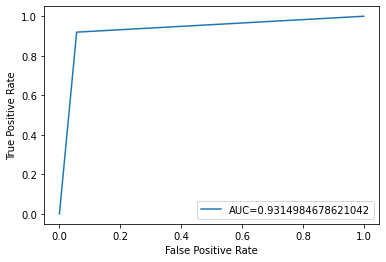

In [49]:
# knn classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_valid)

#train and validation scores
train_score = knn_model.score(X_train,y_train)
validation_score = knn_model.score(X_valid,y_valid)
roc_auc = roc_auc_score(y_valid, y_pred)

# printing the performance metrics
print("Train Accuracy = {}".format(train_score))
print("Validation Accuracy = {}".format(validation_score))
print("ROC Area under Curve = {}".format(roc_auc))
print(confusion_matrix(y_valid, y_pred))

print(classification_report(y_valid, y_pred))
fpr, tpr, _ = metrics.roc_curve(y_valid,  y_pred)
auc = metrics.roc_auc_score(y_valid, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

> * **Observations:**
    * Train Accuracy = 0.9530246156067278
    * Validation Accuracy = 0.9304071614207334
    * Precision = 0.95
    * Recall = 0.92
    * F1-Score = 0.94 
    * ROC Area under Curve = 0.9314984678621042

> **Insights:**
>   * As expected, the accuracies of both train and validation data have increased upon increasing the train size from 60% to 80%.
>   * Hyperparameter tuning can be done to further increase this accuracy.

## 7.3. Hyperparameter Tuning <a class="anchor" id="7.3"></a>

> * **KNN Hyperparameters:**
> * **n_neighbors**
    * 'n_neighbors' represents number of neighbors (K).  
    * Choosing the right K value is an important hyperparameter for implementing KNN classifier algorithm.
> * **p**
    * 'p' represents the power parameter for Minkowski distance.
    * Mathematical representation for Minkowski distance:
    $$\left ( \sum_{i=1}^{n} \left | x_{i} - y_{i}\right |^{p}\right )^{1/p} $$
    $$\mathit{Where, n = number\,  of\,  dimensions\,  and\,  x_{i}, y_{i} = data\,  points}$$
    * KNN classifier predicts the new data points based on the majority category of nearest neighbours.
    * This is done by calculating the K-th minimum distance between the train and test data points. The distance is Manhattan or Euclidean distance.
    * Minkowski Distance can be defined as the generalized form of Euclidean and Manhattan distance
        * when p = 1, it is Manhattan distance (sum of absolute differences between points across all the dimensions)
        * Mathematical representation:
        $$\sum_{i = 1}^{n}\left | x_{i} - y_{i}\right |$$
        * when p = 2, it is Euclidean distance (shortest distance between 2 points)
        * Mathematical representation:
        $$\sqrt{\sum_{i = 1}^{n}\left (x_{i} - y_{i}\right)^{2}}$$

In [50]:
# 1 hyperparameter
# NOTE: This process takes around 6 minutes to compile
knn_params = {"n_neighbors": np.arange(10)}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv = 10, scoring = 'accuracy', return_train_score = False, verbose=1)
knn_cv.fit(X_train, y_train)

print("The best parameters: " + str(knn_cv.best_params_)) 

Fitting 10 folds for each of 10 candidates, totalling 100 fits
The best parameters: {'n_neighbors': 7}


In [63]:
# tuned knn classifier
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_valid)

#train and validation scores
train_score = knn_model.score(X_train,y_train)
validation_score = knn_model.score(X_valid,y_valid)
roc_auc = roc_auc_score(y_valid, y_pred)

# printing the performance metrics
print("Train Accuracy = {}".format(train_score))
print("Validation Accuracy = {}".format(validation_score))
print("ROC Area under Curve = {}".format(roc_auc))
print(confusion_matrix(y_valid, y_pred))

print(classification_report(y_valid, y_pred))

Train Accuracy = 0.9484046776871435
Validation Accuracy = 0.9321397632110886
ROC Area under Curve = 0.9331657399839218
[[2971  175]
 [ 295 3485]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3146
           1       0.95      0.92      0.94      3780

    accuracy                           0.93      6926
   macro avg       0.93      0.93      0.93      6926
weighted avg       0.93      0.93      0.93      6926



> * **Observations:**
    * Hyperparameter: k=7
    * Train Accuracy = 0.9484046776871435
    * Validation Accuracy = 0.9321397632110886
    * Precision = 0.95
    * Recall = 0.92
    * F1-Score = 0.94 
    * ROC Area under Curve = 0.9331657399839218

In [53]:
# 2 hyperparameters
# NOTE: This process takes around 16 minutes to compile 
k_range = [1,2,3,4,5,6,7,8,9,10]
metrics = ['euclidean','manhattan'] 
param_grid = dict(metric = metrics, n_neighbors = k_range)
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv = 10, scoring='accuracy', return_train_score = False, verbose=1)
knn_cv.fit(X_train, y_train)

print("The best parameters: " + str(knn_cv.best_params_)) 

Fitting 10 folds for each of 20 candidates, totalling 200 fits
The best parameters: {'metric': 'manhattan', 'n_neighbors': 5}


In [58]:
# tuned knn classifier
knn_model = KNeighborsClassifier(n_neighbors=5,p=1)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_valid)

#train and validation scores
train_score = knn_model.score(X_train,y_train)
validation_score = knn_model.score(X_valid,y_valid)
roc_auc = roc_auc_score(y_valid, y_pred)

# printing the performance metrics
print("Train Accuracy = {}".format(train_score))
print("Validation Accuracy = {}".format(validation_score))
print("ROC Area under Curve = {}".format(roc_auc))
print(confusion_matrix(y_valid, y_pred))

print(classification_report(y_valid, y_pred))

Train Accuracy = 0.9588175846387064
Validation Accuracy = 0.9397920877851573
ROC Area under Curve = 0.9406028315119225
[[2987  159]
 [ 258 3522]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      3146
           1       0.96      0.93      0.94      3780

    accuracy                           0.94      6926
   macro avg       0.94      0.94      0.94      6926
weighted avg       0.94      0.94      0.94      6926



> * **Observations:**
    * Hyperparameter: k=7, p=1
    * Train Accuracy = 0.9588175846387064
    * Validation Accuracy = 0.9397920877851573
    * Precision = 0.96
    * Recall = 0.93
    * F1-Score = 0.94 
    * ROC Area under Curve = 0.9406028315119225

> **Insights:**
>   * Upon tuning two hyperparameters of knn classifier, improved performance was observed.
>   * Now the knn classifier algorithm can be applied to the test data with the hyperparameters k=5 and p=1.

In [60]:
# tuned knn classifier on test data
knn_model = KNeighborsClassifier(n_neighbors=5,p=1)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

#train and test scores
train_score = knn_model.score(X_train,y_train)
test_score = knn_model.score(X_test,y_test)
roc_auc = roc_auc_score(y_test, y_pred)

# printing the performance metrics
print("Train Accuracy = {}".format(train_score))
print("Test Accuracy = {}".format(test_score))
print("ROC Area under Curve = {}".format(roc_auc))
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

Train Accuracy = 0.9588175846387064
Test Accuracy = 0.9376353399740147
ROC Area under Curve = 0.9388086011701237
[[2919  156]
 [ 276 3576]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3075
           1       0.96      0.93      0.94      3852

    accuracy                           0.94      6927
   macro avg       0.94      0.94      0.94      6927
weighted avg       0.94      0.94      0.94      6927



> * **Observations:**
    * Hyperparameter: k=7, p=1
    * Train Accuracy = 0.9588175846387064
    * Test Accuracy = 0.9376353399740147
    * Precision = 0.96
    * Recall = 0.93
    * F1-Score = 0.94 
    * ROC Area under Curve = 0.9388086011701237

- - -

# 8. Conclusion <a class="anchor" id="8"></a>

>   * In this report, a thorough analysis of the KNN classifier algorithm has been done on the  "Airlines Customer satisfaction" dataset.
>   * In depth data pre-processing and analysis also has been done to gain insights on the data.
>   * The model's working has been clearly explained along with its hyperparameters.
>   * Observations were made on how the performance of the model varied with the change in hyperparameters and the amount of training data used.
>   * Performance of the model increased with the increase in training data and hyperparameter tuning.

---

# 9. References <a class="anchor" id="9"></a>

>    * [Kaggle](https://www.kaggle.com/)
>    * [Machine Learning Mastery](https://machinelearningmastery.com/)
>    * [Analytics Vidhya](https://www.analyticsvidhya.com/)
>    * [Towards Data Science](https://towardsdatascience.com/)
>    * [Analytics India Mag](https://analyticsindiamag.com/)